In [15]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS" # override default font
%matplotlib inline

In [3]:
df = pd.read_csv('./Irregular_347_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_50000.csv', header=[1,2])
# df = pd.DataFrame(df.to_records())

In [4]:
header_1 = df.columns.get_level_values(0)
header_2 = df.columns.get_level_values(1)
col_names = []

for i in range(len(header_1)):
    col_names.append(' '.join([header_1[i], header_2[i]]))

In [5]:
df.columns = col_names

## Remove outlier

In [5]:
df = df[df['toe likelihood'] > 0.9]

In [6]:
df

,bodyparts coords,HL x,HL y,HL likelihood,HR x,HR y,HR likelihood,FL x,FL y,FL likelihood,FR x,FR y,FR likelihood
0,0,1837.940552,280.248535,0.245278,1827.334229,272.513855,0.994957,1749.839233,236.631790,0.110780,1746.649170,234.121735,0.968226
1,1,1835.893188,281.547882,0.588264,1821.984131,264.530273,0.999958,1745.831665,242.846436,0.807693,1746.418945,240.821045,0.896555
2,2,1835.570679,286.204590,0.634426,1824.534180,268.036896,0.998978,1747.199951,243.710724,0.085385,1746.742065,242.437958,0.704596
3,3,1834.872681,285.575714,0.614823,1824.257690,267.370941,0.995532,1746.567017,239.397690,0.065631,1744.380615,239.248795,0.323667
4,4,1831.634644,287.291077,0.903799,1817.608521,265.347290,0.999922,1739.769287,236.971191,0.006146,1736.595459,248.787582,0.008449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,2714,319.260223,174.831497,0.000609,906.174988,145.422867,0.000176,1196.488037,161.622482,0.002621,1482.620117,3.954501,0.000026
2715,2715,319.485138,175.169968,0.000272,906.660034,145.641037,0.000144,1196.847046,162.911224,0.000870,979.988403,317.355469,0.000159
2716,2716,319.633545,174.526901,0.000265,907.088501,146.659821,0.000067,320.303864,173.344818,0.000126,732.755798,0.002012,0.000087
2717,2717,317.654877,165.911301,0.000121,907.244995,146.174500,0.000081,1196.423340,163.280899,0.002548,732.306152,1.175359,0.000126


## Plot initial data

Text(0.5, 1.0, 'coordinates by frame')

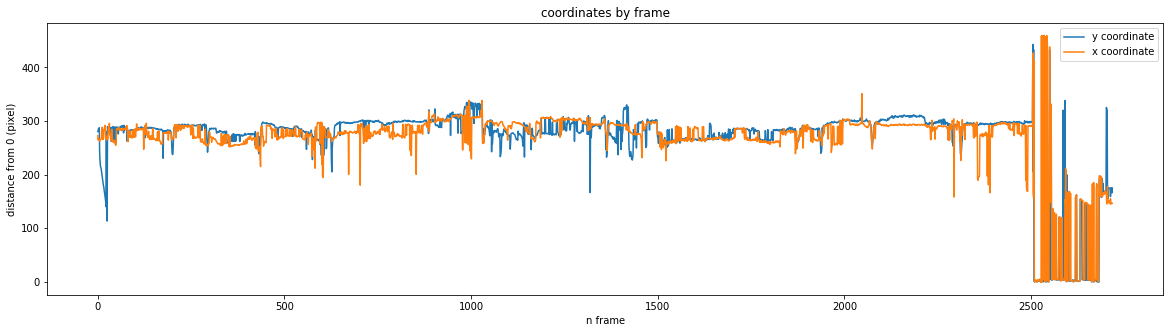

In [18]:
plt.figure(figsize=(20,5))
plt.plot(df['bodyparts coords'], df['HL y'])
# plt.plot(df['bodyparts coords'], df['HL x'])
plt.plot(df['bodyparts coords'], df['HR y'])
# plt.plot(df['bodyparts coords'], df['HR x'])
# plt.plot(df['bodyparts coords'], df['FL y'])
# plt.plot(df['bodyparts coords'], df['FL x'])
# plt.plot(df['bodyparts coords'], df['FR y'])
# plt.plot(df['bodyparts coords'], df['FR x'])
plt.legend(['y coordinate', 'x coordinate'])
plt.xlabel('n frame')
plt.ylabel('distance from 0 (pixel)')
plt.title('coordinates by frame')

In [19]:
def findPeaks(index, data, coord_type = 0): 
    from scipy.signal import peak_widths, find_peaks
    import numpy as np
    '''
    index: df['bodyparts coords']
    data: df['toe x'] or df['toe y']
    coord_type: 0: positive peak; 1: negative peak (y coord)
    '''
    if coord_type == 0:
        peaks, properties = find_peaks(data, prominence=0, distance=18, height=-10, width = 0)
#         width_half = peak_widths(data, peaks, rel_height=0.5)
    else:
        peaks, properties = find_peaks(-data, prominence=(10,100000), height=-5000, width = 0)
        width_half = peak_widths(-data, peaks, rel_height=0.5)
    is_peak = np.zeros(len(index))
    n_peaks = 0
    current_data = data.iloc[0]
    norm = np.max(data)
    std = np.std(data)
    for i in range(len(is_peak)):
        if i in peaks:
#             is_peak[i] = df['toe y'][i]
            is_peak[i] = norm-std*4
            n_peaks += 1
        else:
            is_peak[i] = norm-std*2
        current_data = data.iloc[i]
    
    plt.figure(figsize=(20,10))
    ax1 = plt.subplot(2, 1, 1)
    plt.plot(index.iloc[:], data.iloc[:])
    plt.plot(index.iloc[:], is_peak,'x', color='r') 
    ax1.legend(['coordinate', 'peak'], loc=3)
    ax1.set_xlabel('n frame')
    ax1.set_ylabel('distance from 0 (pixel)')
    ax1.set_title('coordinates by frame')
    print(n_peaks, 'peaks')
#     print(*width_half[1:])
    
    ax2 = plt.subplot(2, 1, 2)
    plt.plot(index.iloc[:], data.iloc[:])
    plt.scatter(index.iloc[peaks], data.iloc[peaks], s=15,color='r')
    ax2.legend(['coordinate', 'peak'], loc=3)
    ax2.set_xlabel('n frame')
    ax2.set_ylabel('distance from 0 (pixel)')
    if coord_type == 0:
        plt.vlines(x=index.iloc[peaks], ymin=data.iloc[peaks] - properties["prominences"], ymax=data.iloc[peaks], color="r")
#         plt.hlines(*width_half[1:], color="r")
    else:
        plt.vlines(x=index.iloc[peaks], ymin=data.iloc[peaks] + properties["prominences"], ymax=data.iloc[peaks], color="r")
#         plt.hlines(*width_half[1:], color="r")
        
    h_peaks = np.mean(properties["prominences"])    
    print(h_peaks, 'pixels')
    
    return n_peaks, h_peaks

## Find x-coordinate peaks with scipy

111 peaks
156.42187685579867 pixels


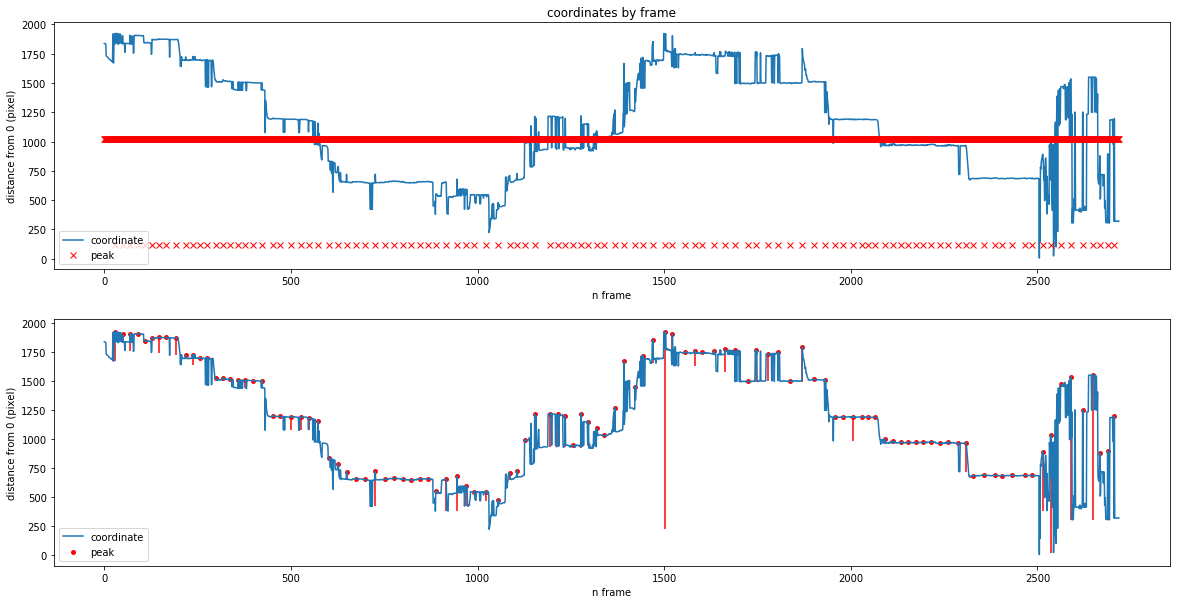

In [20]:
n_peaks, h_peaks = findPeaks(df['bodyparts coords'].iloc[:], df['HL x'].iloc[:])

## Find y-coordinate peaks with scipy

148 peaks
55.79651860449765 pixels


(148, 55.79651860449765)

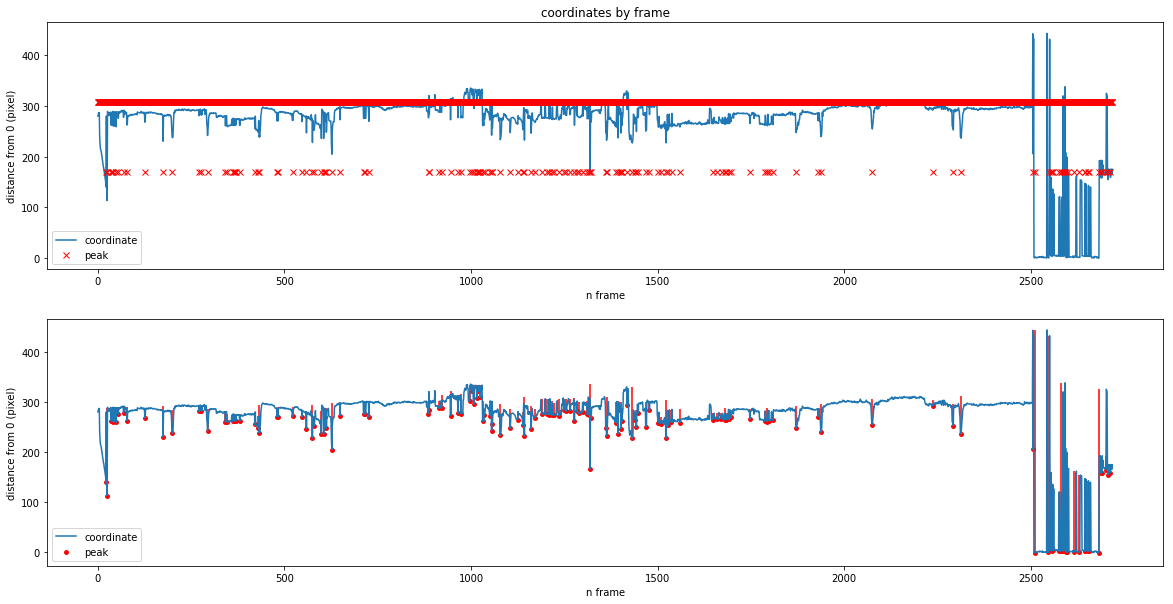

In [22]:
findPeaks(df['bodyparts coords'].iloc[:], df['HL y'].iloc[:], 1)

208 peaks
57.77859756809015 pixels


(208, 57.77859756809015)

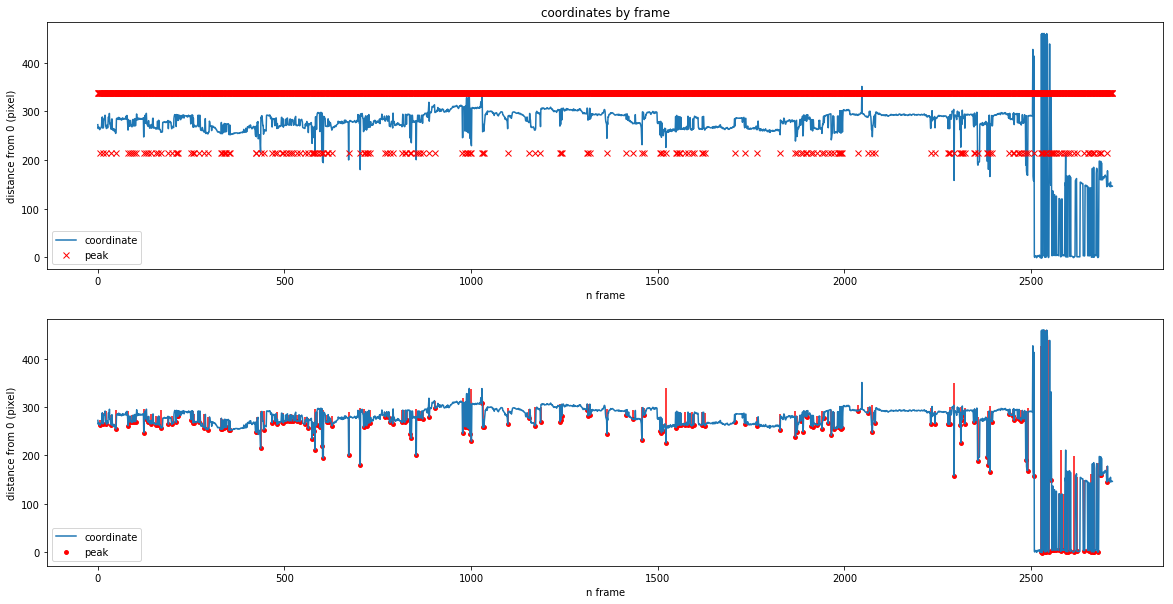

In [23]:
findPeaks(df['bodyparts coords'].iloc[:], df['HR y'].iloc[:], 1)